In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('IRIS.csv')

In [9]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Business Case : 
#### We've to analyze this iris data and perform K-means clustering on the features of this data to divide them into clusters.

### Basic Checks.

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
data.duplicated().sum()     # Means there are 3 duplicate values in data.

3

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [16]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Insights  
There are no missing values as the count is same.

## Domain Analysis

Sepal Length & Width: Related to the outer part of the flower, these features help in distinguishing species like setosa due to its smaller sepals.  

Petal Length & Width: More discriminative, as virginica and versicolor differ significantly in petal dimensions.

Species: There are three species in Iris flower. i.e. Setosa,Verginica,Versicolor.

## Exploratory Data Analysis.

#### Univariate Analysis.

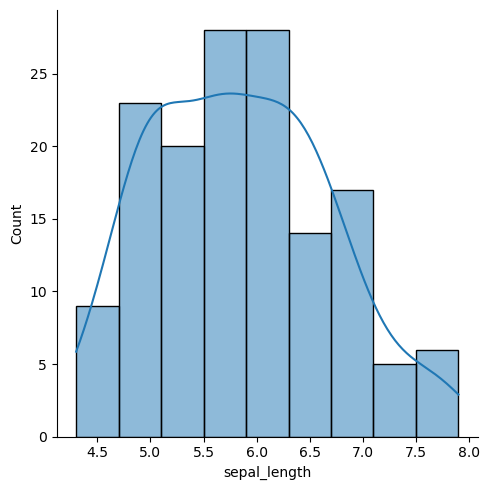

In [17]:
# Analyzing sepal length

sns.displot(x='sepal_length',data=data,kde=True)
plt.show()

Insights:
1. From above data, we can say that the feature sepal_length is somewhat normally distibuted.
2. The sepal_length of most of iris species lies between 5.5 to 6.5

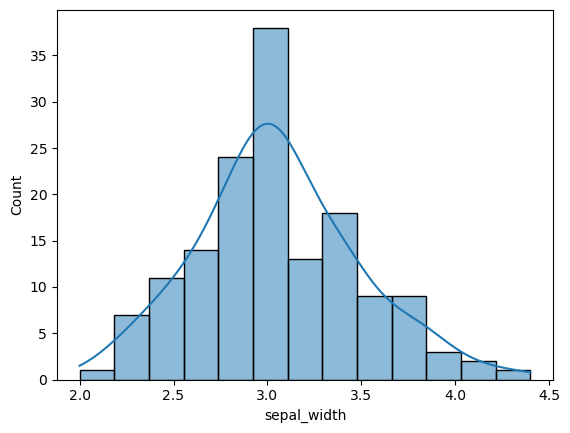

In [18]:
# Analyzing sepal_width
sns.histplot(x='sepal_width',data=data,kde=True)
plt.show()

Insight:
Feature sepal_width is normally distibuted.

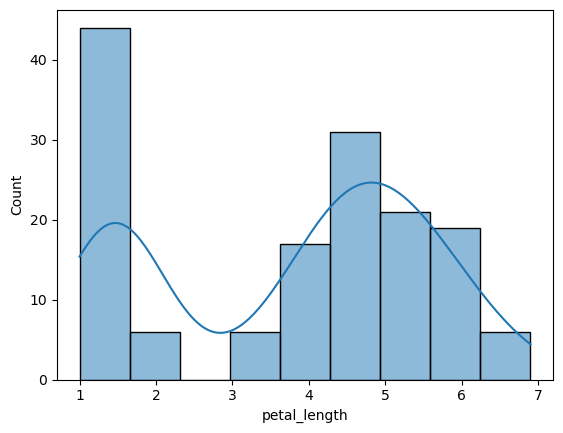

In [19]:
# Analyzing petal_length
sns.histplot(x='petal_length',data=data,kde=True)
plt.show()

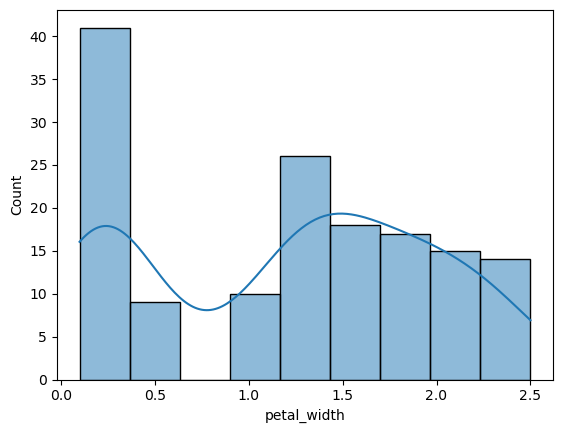

In [20]:
# Analyzing petal_width
sns.histplot(x='petal_width',data=data,kde=True)
plt.show()

### Bivariate Analysis.

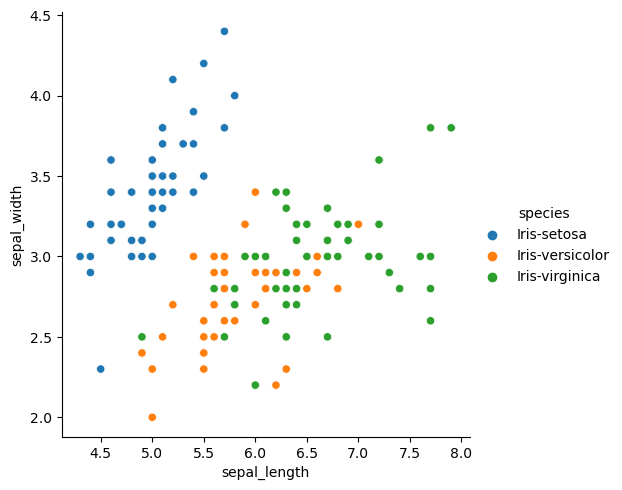

In [21]:
# Analyzing sepal_length and sepal_width with species.
sns.relplot(x='sepal_length',y='sepal_width',data=data,hue='species')
plt.show()

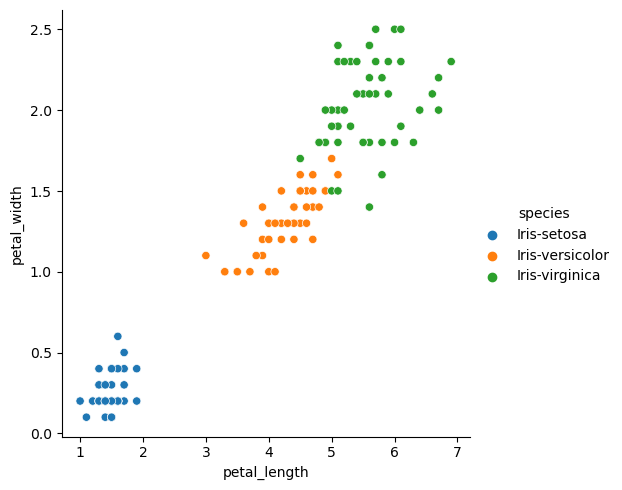

In [22]:
# Analyzing petal_length and petal_width with species.
sns.relplot(x='petal_length',y='petal_width',data=data,hue='species')
plt.show()

### Data Preprocessing

1. Checking and handling Outliers.

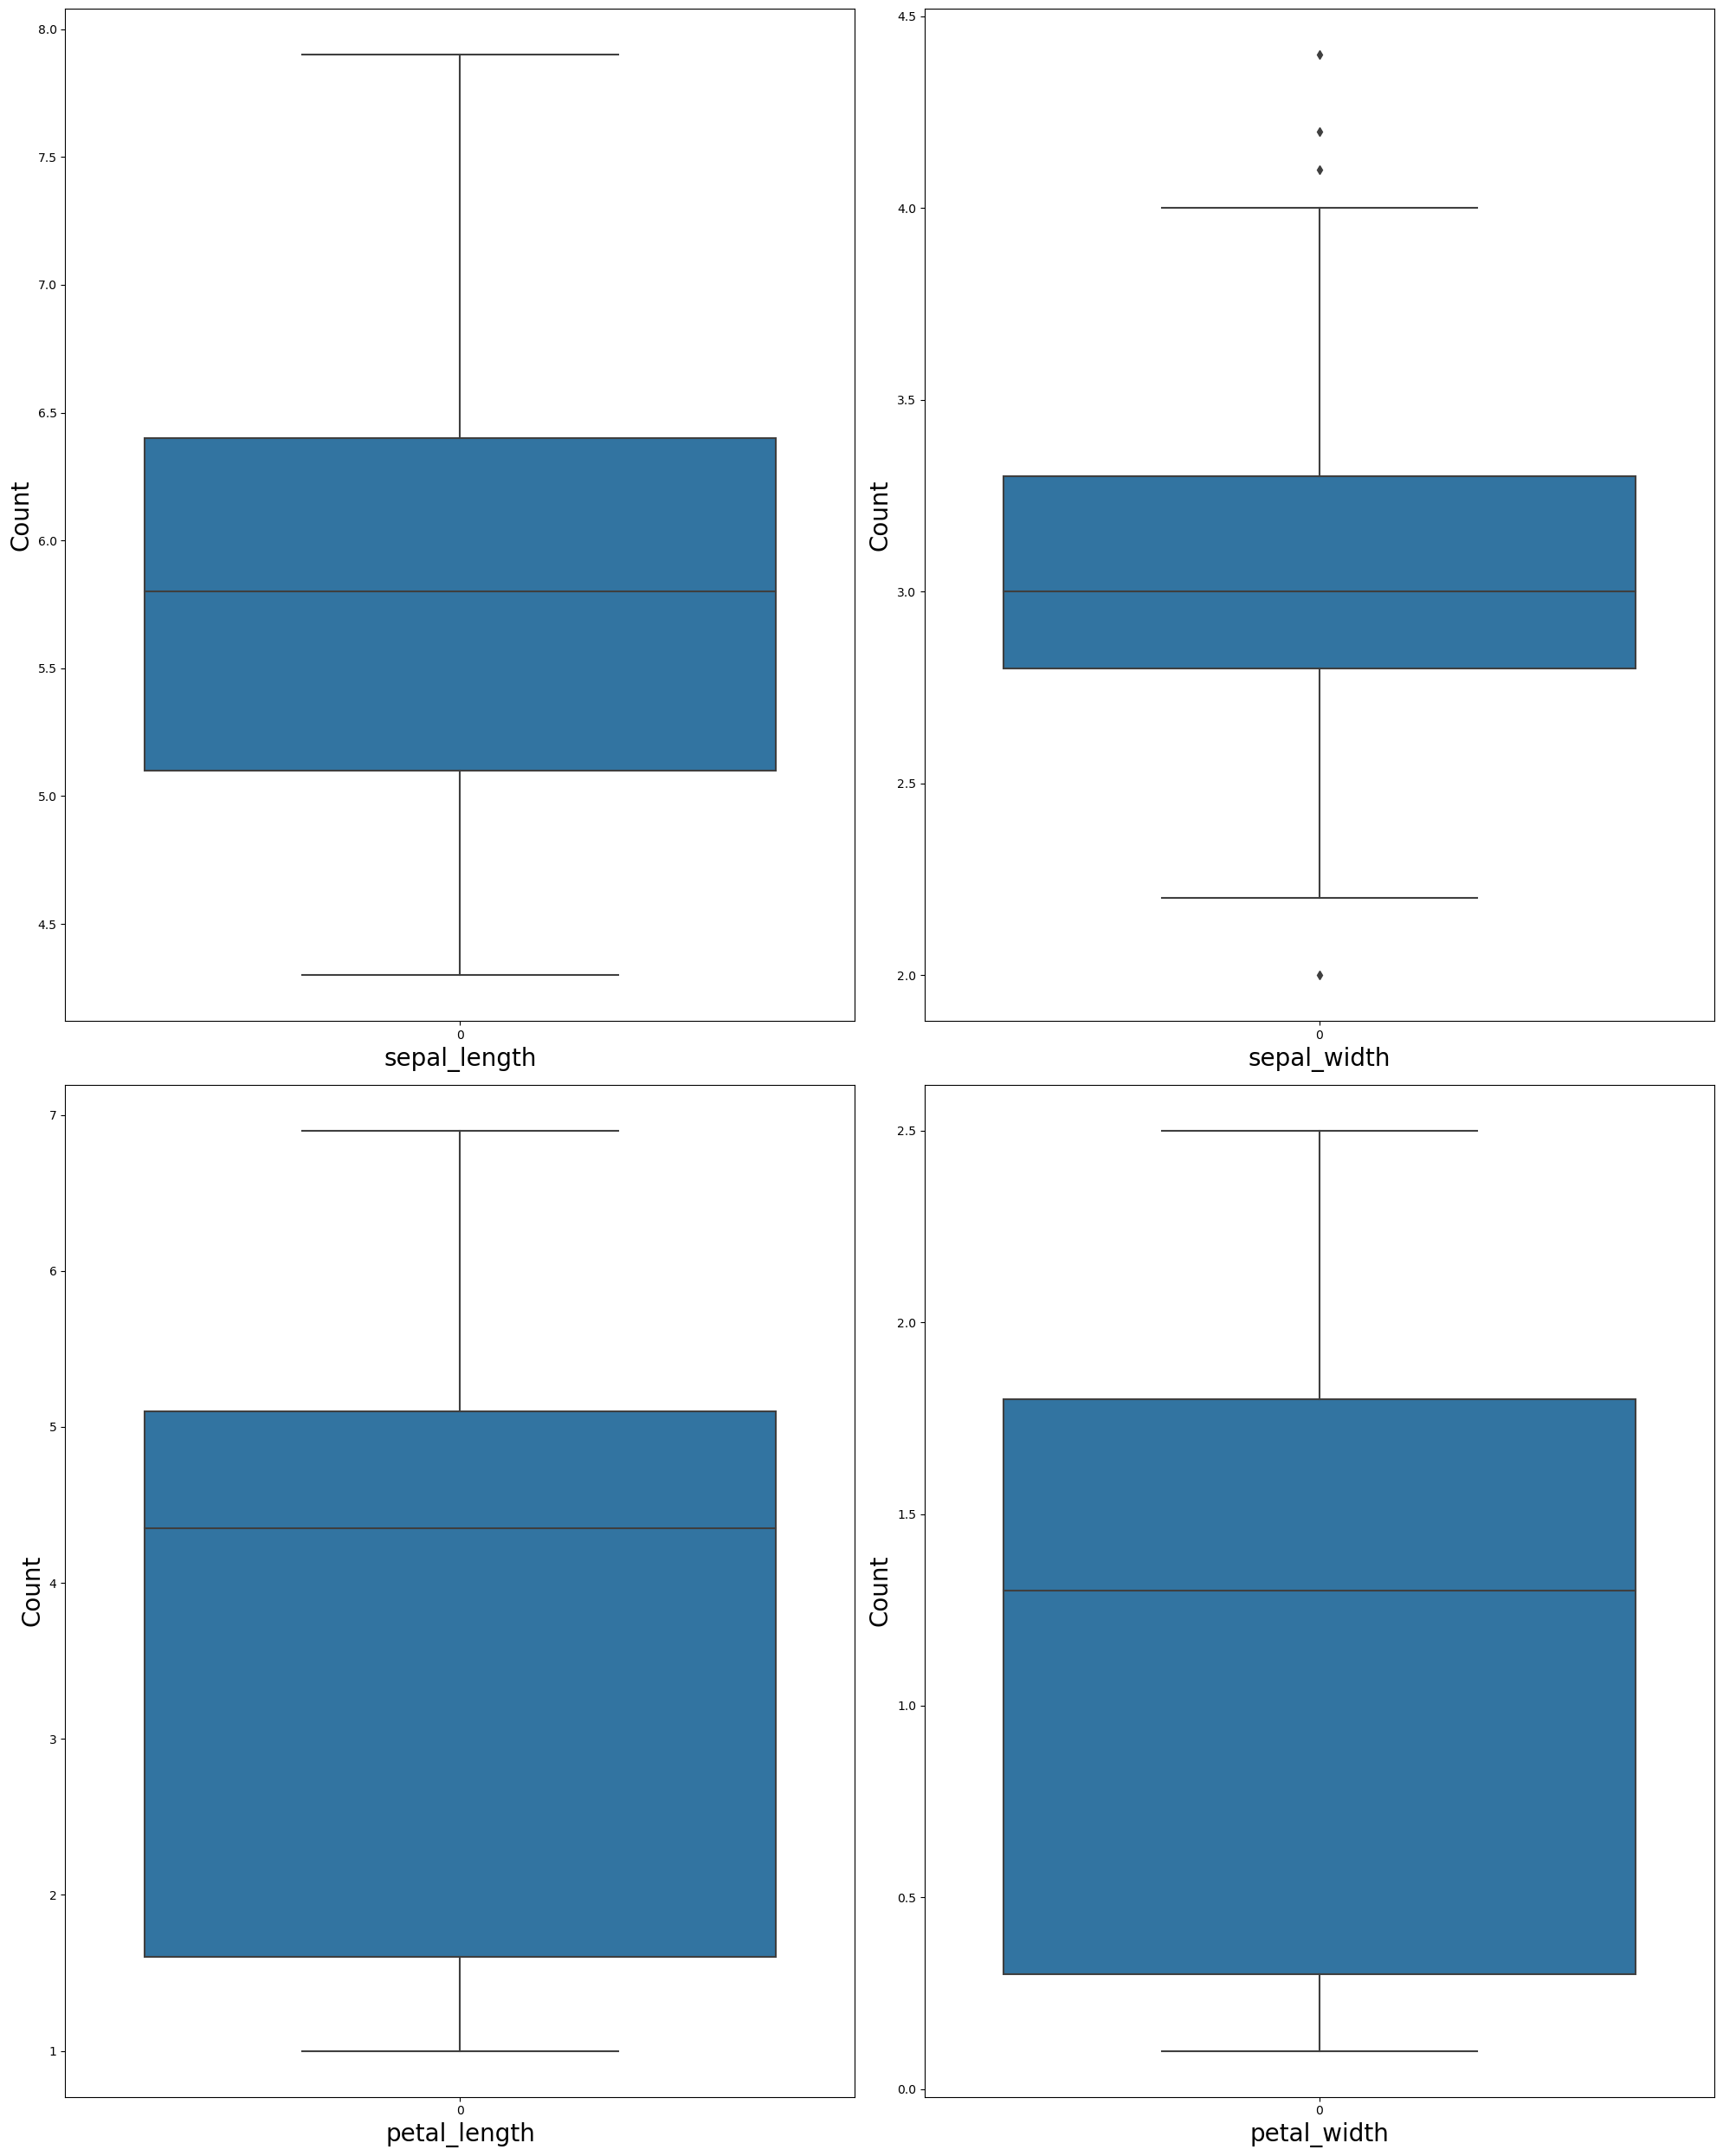

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.drop('species',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Insights 
- From above data, we can see that there outliers in sepal_width.

In [24]:
q1 = data['sepal_width'].quantile(0.25)
q3 = data['sepal_width'].quantile(0.75)
print('q1 = ',q1)
print('q3 = ',q3)

q1 =  2.8
q3 =  3.3


In [25]:
IQR = q3-q1
print('IQR = ',IQR)

IQR =  0.5


In [26]:
min_ = q1-1.5*IQR
max_ = q3+1.5*IQR
print('min = ',min_)
print('max_ = ',max_)

min =  2.05
max_ =  4.05


In [27]:
data.loc[data['sepal_width']<min_]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [28]:
data.loc[data['sepal_width']>max_]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [29]:
# Percentage
len(data.loc[data['sepal_width']<min_])+len(data.loc[data['sepal_width']>max_])/len(data)*100

3.0

In [30]:
data['sepal_width'].median()

3.0

In [31]:
# Imputing outliers in the range
data.loc[data['sepal_width']<min_,'sepal_width'] = data['sepal_width'].median()

In [32]:
data.loc[data['sepal_width']>max_,'sepal_width'] = data['sepal_width'].median()

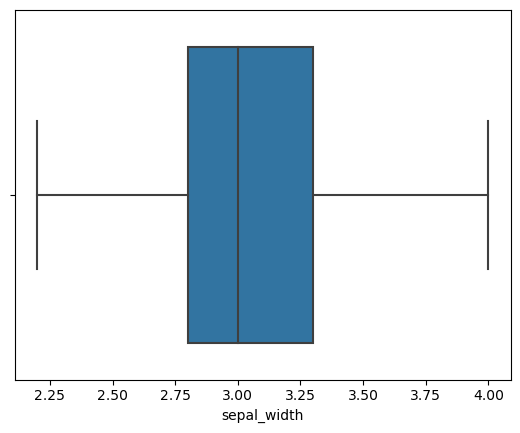

In [33]:
# Now checking whether outliers are handled correctly by using graph

sns.boxplot(x=data.sepal_width)
plt.show()

#### So we've handled outliers successfully in sepal_width column.

### Numerical data for clustering.

In [52]:
x = data.iloc[:,0:4]
x


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Elbow technique

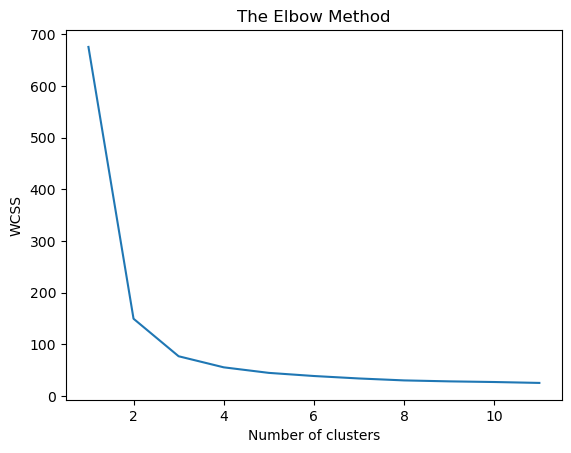

In [53]:
# Elbow Method
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range (1,12):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #In k-means clustering, inertia measures how well the clusters are formed. 
                                 #It is the sum of squared distances of each point to the nearest cluster center.
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Model Building

In [54]:
# Initialise the model with K as 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)

#Training the model
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [55]:
label=model.labels_
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [40]:
#label2=model.labels_
#label2

In [56]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
from collections import Counter
Counter(label)                          #to count the occurrences of each cluster label

Counter({1: 50, 0: 62, 2: 38})

In [43]:
#from collections import Counter
#Counter(label2)

In [44]:
color_scheme = np.array(['red','blue','green','cyan'])

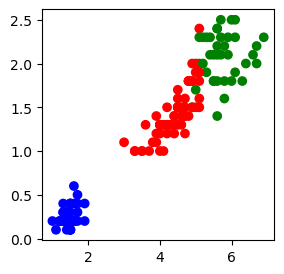

In [59]:
# Visualize the clusters formed by the model 
plt.figure(figsize=(3,3))
plt.scatter(x.petal_length,x.petal_width,color=color_scheme[model.labels_]);
#plt.scatter(x2.sepal_length,x2.sepal_width,color=color_scheme[model2.labels_]);

In [46]:
data['label'] = label
data

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [47]:
#data.drop('Labels',axis=1,inplace=True)

In [48]:
new_point=[[2,5]] # A new observation
model.predict(new_point) # predicted label

array([2])

In [49]:
data.drop('label',axis=1,inplace=True)

In [50]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,label)
score

0.6602760882193361